### Системы аналитических вычислений.

#### Лабораторная работа №2: 
- Задание 1А. Методы поиска корней функции: дихотомии и Ньютона.
- Задание 2. Расширенный алгоритм Евклида поиска НОД.
- Задание 3. Приведение уравнения поверхности к каноническому виду. 

#### Выполнил студент Короткевич Л. В., гр. М8О-208Б-19.

#### Задание 1. Методы поиска корней функции: дихотомии и Ньютона.

- Реализовать в виде функций,
- Сделать ползунок для перебора значений вх. параметров,
- Сделать вывод 6 кадров нахождения решения и оформить через массив графиков (6 графиков на одном холсте, расположенные в отдельных ячейках)
- Сравнить ответ с тем, что даёт solve

In [1]:
y(x) = x**3 - 9 * x**2 + 23 * x - 15 # функция для демонстрации методов
y.show() # символьное выражение, aka sage symbolic expression
print(type(y))

x |--> x^3 - 9*x^2 + 23*x - 15

<class 'sage.symbolic.expression.Expression'>


#### График функции.

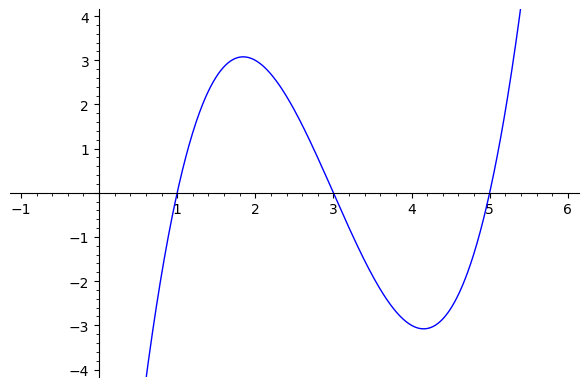

In [2]:
plot(y, xmin = -1, xmax = 6, ymin=-4, ymax=4)

#### Поиск корней методом Дихотомии.

In [3]:
'''
Функция принимает на вход 5 параметров:
- func: символьное выражение, функция, корни которой будем искать
- left: левая граница текущей итерации
- right: правая граница текущей итерации
- eps: точность вычисления корня
- visualize: если true, функция соберет массивчик графиков и вернёт его

Возвращает: left - численное решение, корешок
            plotsArray - собсна массивчик графиков
'''

def diсhotomy(func, left, right, eps=1e-15, visualize=False):
    # график функции
    funcPlot = plot(y, (x, 0, 6), ymin=-4, ymax=5) 
    # массивчик графиков для визуализации
    plotsArray = []
    # пока не соблюдена заданная точность
    while abs(right - left) >= eps:
        # определяем серединку отрезка
        mid = (left + right) / 2
        # сравниваем значения на краях и в непосредственно серединке
        if func(x=left) * func(x=mid) > 0:
            left = mid
        elif func(x=mid) * func(x=right) > 0:
            right = mid
        else:
            left = right = mid
        
        # сохраним графичек текущей итерации в массивчик
        if visualize:
            plotsArray.append(
                # текущая точка и графичек
                ( point( (mid, func(mid)), color="red", size=10 ) + funcPlot )
            )
        
    if visualize:
        return left, plotsArray
    else:
        return left

Убедимся в том, что функция правильно работает.

In [4]:
diсhotomy(y, -1.1, 2)

1.00000000000000

In [5]:
diсhotomy(y, 2, 4)

3

In [6]:
diсhotomy(y, 4.9, 1000)

5.00000000000000

In [7]:
diсhotomy(y, 1.2, 3.1)

3.00000000000000

Теперь повизуализируем всю эту красоту.

In [8]:
@interact
def dichotomy_visualized(left=(0, 6, 0.1), right=(0, 6,  0.1)):
    result, plots = diсhotomy(y, left, right, eps=1e-1, visualize=True)
    print('root =', result)
    graphics_array(
        [
            [plots[i]] for i in range(0, len(plots), 1)
        ]
    ).show(figsize=5)

Interactive function <function dichotomy_visualized at 0x7f6aebc65430> with 2 widgets
  left: FloatSlider(valu…

#### Нахождение корней методом Ньютона

In [9]:
def newton(func, left, right, eps=1e-15, visualize=False):
    funcPlot = plot(y, (x, 0, 6), ymin=-4, ymax=5) 
    plotsArray = []
    deriv = func.derivative()
    cur = left
    next = (left + right) / 2
    while abs(next - cur) > eps:
        if visualize:
            tan = func(x=cur) + deriv(x=cur) * (x - cur)
            plotsArray.append(((plot(tan, (x, 0, 6), ymin=-9, ymax=5, color="red")) + funcPlot))
        cur = next
        next = cur - func(x=cur) / deriv(x=cur)
    if visualize:
        tan = func(x=cur) + deriv(x=cur) * (x - cur)
        return next, plotsArray
    else:
        return next

Проверим работоспособность нашей функции.

In [10]:
newton(y, -1, 1.1)

1.00000000000000

In [11]:
newton(y, 2.99, 4)


3.00000000000000

In [12]:
newton(y, 3.1, 10000)

5.00000000000000

Порисуем.

In [13]:
@interact
def newton_visualized(left=(0, 6, 0.1), right=(0, 6, 0.1)):
    result, plots = newton(y, left, right, eps=1e-2, visualize=True)
    print('root =', result)
    graphics_array(
        [
            [plots[i]] for i in range(0, len(plots), 1)
        ]
    ).show(figsize=5)

Interactive function <function newton_visualized at 0x7f6ae8643550> with 2 widgets
  left: FloatSlider(value=3…

Сравним с solve.

In [14]:
solve(y, x)

[x == 1, x == 5, x == 3]

#### Задание 2. Расширенный алгоритм Евклида поиска НОД.
- реализовать расширенный алгоритм Евклида,
- получить НОД, сравнить его с результатом от функции gcd()
- получить представление НОД в виде: f*u + v*g 

Вариант 5: 

$f = 12x^7 - 168x^5 + 288x^3 + 324x \\
g = 4x^6 - 28x^4 + 20x^3 + 48x^2 - 60x$

In [15]:
R.<x> = PolynomialRing(QQ) # считать будем в R - кольце рациональных чисел
f = 12*x^7 - 168*x^5 + 288*x^3 + 324*x
g = 4*x^6 - 28*x^4 + 20*x^3 + 48*x^2 - 60*x

In [16]:
# standart gcd
show(f)
show(g)
show(gcd(f, g))

12*x^7 - 168*x^5 + 288*x^3 + 324*x

4*x^6 - 28*x^4 + 20*x^3 + 48*x^2 - 60*x

x^3 - 3*x

In [17]:
'''
Функция принимает на вход:
- два многочлена f, g
    
Возвращает:
- полином f - НОД полиномов f и g
- u, v - коэффициенты в разложении Безу: ax + by = gcd(a, b)
'''
def extGCD(f, g):
    u, uu, v, vv = 1, 0, 0, 1
    while g != 0:
        quotient = f // g
        remainder = f % g
        q = quotient
        f, g = g, remainder
        u, uu = uu, u - uu*q
        v, vv = vv, v - vv*q
    return (f, u, v)

In [18]:
normConst = 1420804/1521
gcdPolynomial, a, b = extGCD(f, g)
show("GCD(f, g) = ", gcdPolynomial(x) / normConst)
show("a = ", a(x) / normConst)
show("b = ", b(x) / normConst)

'GCD(f, g) = ' -1/3*x^3 + x

'a = ' -13/57992*x^2 - 145/521928*x + 361/260964

'b = ' 39/57992*x^3 + 145/173976*x^2 - 1541/173976*x - 200/21747

In [19]:
a / normConst * f + b / normConst * g

-1/3*x^3 + x

Со стандартным GCD результат совпал. GCD в виде $af + bg$ получен. Задача решена.